In [81]:
import numpy as np
import unityneuro.render as urn
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
urn.setup()

(URN) connected to server
Login sent with ID: Dan


In [117]:
# load ontology structure to swap #s for acronyms
ontology = pd.read_csv('./ontology_structure_minimal.csv')
atlas_id = ontology.atlas_id.values
beryl_id = ontology.beryl_id.values
acronym = ontology.acronym.values

def id2acronym(id):
  if np.any(beryl_id==id):
    return acronym[beryl_id==id][0]
  
  return None

In [110]:
allen_labels = np.load('./PETH_area_label.npy')
beryl_labels = np.load('./PETH_ses_id.npy')

stim = np.load('./PETH_stim.npy')
move = np.load('./PETH_move.npy')
feedback = np.load('./PETH_feedback.npy')

In [28]:
# base_temp = np.mean(stim[:,0:19,:],axis=1) + 0.1
# baseline = np.zeros((base_temp.shape[0], 50, base_temp.shape[1]))
# for i in np.arange(0,50):
#   baseline[:,i,:] = base_temp

In [44]:
# stim_bn = np.divide(np.clip(stim - baseline, 0, np.Inf), baseline)
# move_bn = np.divide(np.clip(move - baseline, 0, np.Inf), baseline)
# feed_bn = np.divide(np.clip(feedback - baseline, 0, np.Inf), baseline)

In [111]:
# Compute left/right difference
stim_lr = stim[:,:,2] - stim[:,:,0]

In [112]:
# get all neurons from each brain area, average them
uareas = np.unique(beryl_labels)

stim_area = np.zeros((len(uareas), stim_lr.shape[1]))

for i,area in enumerate(uareas):
  area_idx = beryl_labels==area
  
  stim_area[i,:] = np.mean(stim_lr[area_idx,:], axis=0)

# square to make it easier to see differences (and to make abs value)
stim_area = np.power(stim_area, 2)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 52749 but corresponding boolean dimension is 1327

In [68]:
stim_area.shape

(260, 50)

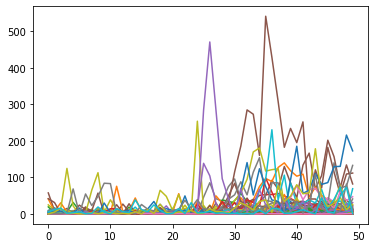

In [69]:
plt.figure()
plt.plot(stim_area.T)

In [125]:
urn.clear_areas()


In [133]:

area_vis = {}
missing_area_vis = {}

suffixes = ['-lh','-rh']

for area_id in uareas:
  area_name = id2acronym(area_id)

  if area_name is not None:
    for suffix in suffixes:
      an = area_name + suffix
      area_vis[an] = True

# for area_id in beryl_id:
#   if area_id not in uareas:
#     area_name = id2acronym(area_id)

#     if area_name is not None:
#       missing_area_vis[area_name] = True


urn.set_area_visibility(area_vis)
urn.set_area_visibility(missing_area_vis)

In [131]:
area_vis

{'IC': True,
 'PSV': True,
 'IF': True,
 'PT': True,
 'IG': True,
 'AAA': True,
 'IGL': True,
 'PVa': True,
 'III': True,
 'PVH': True,
 'ACAd': True,
 'ILA': True,
 'ACAv': True,
 'ACB': True,
 'MT': True,
 'IMD': True,
 'PVHd': True,
 'AD': True,
 'LT': True,
 'ADP': True,
 'DT': True,
 'IO': True,
 'AHN': True,
 'IP': True,
 'DCO': True,
 'IPN': True,
 'VCO': True,
 'AId': True,
 'ISN': True,
 'AIp': True,
 'IV': True,
 'PVi': True,
 'AIv': True,
 'PVp': True,
 'AM': True,
 'MRN': True,
 'LA': True,
 'PVpo': True,
 'AMB': True,
 'IRN': True,
 'PRNr': True,
 'LC': True,
 'PVT': True,
 'AOB': True,
 'LD': True,
 'AON': True,
 'LDT': True,
 'PRP': True,
 'LGd': True,
 'RCH': True,
 'NR': True,
 'LGv': True,
 'RE': True,
 'FRP': True,
 'LH': True,
 'RH': True,
 'LHA': True,
 'RL': True,
 'MV': True,
 'LIN': True,
 'RM': True,
 'AP': True,
 'LAV': True,
 'LM': True,
 'RN': True,
 'APN': True,
 'SUV': True,
 'LP': True,
 'RO': True,
 'ARH': True,
 'SPIV': True,
 'LPO': True,
 'RPA': True,